# Introduction
### Physical activity recognition plays an important role in modern health, fitness, and wearable technology. Machine learning models allow us to classify human movements using only sensor measurements from smartphones.
### My research question is: Can I accurately identify human activities such as walking, running, standing, and sitting by using only smartphone accelerometer and gyroscope data?
### Spoiler: The Random Forest model performed very well and PCA showed clear patterns in the activity data.
### In this project, I introduced the dataset, describe how I prepared the data, visualize patterns using PCA, compare a decision tree and a random forest model, and end with a summary of what worked well and what the findings can be used for in the future.

# Data Source Information
### I used the UCI Human Activity Recognition (HAR) dataset.
### It contains smartphone motion data collected from 30 people performing six activities: walking, walking upstairs, walking downstairs, sitting, standing, and laying.
### The phone was kept in the participant’s pockets. The dataset provides many numerical features describing the motion during each activity.
### My goal was to build a model that predicts the activity being performed based only on these motion features.

# Data Cleaning
### The dataset provided separate text files for the features and labels. I loaded the files into Python, combined them into dataframes, and assigned feature names based on the dataset's description.  
### I also verified the training and testing sets and confirmed that no values were missing.


In [8]:
import pandas as pd

# Load feature names as a csv
features = pd.read_csv(
    "UCI HAR Dataset/features.txt",
    sep=r"\s+", # treats spaces as the separators between columns.
    header=None,
    names=["index", "feature"]
)

# Creates a list out of the feature names
feature_names = features["feature"].tolist()

# Fixes duplicate names
for i in range(len(feature_names)):
    feature_names[i] = f"{feature_names[i]}_{i}"

In [9]:
X_train = pd.read_csv(
    "UCI HAR Dataset/train/X_train.txt",
    sep=r"\s+",
    header=None,
    names=feature_names
)

X_train.to_csv("X_train.csv", index=False)

In [10]:
y_train = pd.read_csv(
    "UCI HAR Dataset/train/y_train.txt",
    header=None,
    names=["Activity"]
)

y_train.to_csv("y_train.csv", index=False)

In [11]:
X_test = pd.read_csv(
    "UCI HAR Dataset/test/X_test.txt",
    sep=r"\s+",
    header=None,
    names=feature_names
)

X_test.to_csv("X_test.csv", index=False)

In [12]:
y_test = pd.read_csv(
    "UCI HAR Dataset/test/y_test.txt",
    header=None,
    names=["Activity"]
)

y_test.to_csv("y_test.csv", index=False)

In [13]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

# Feature Selection
### The dataset includes many numerical features based on smartphone motion sensors so PCA gives a visual idea of how the data is structured.

### I used PCA to reduce the data to two components to make a scatter plot. This let me see if the different activities show any patterns in a simpler form.

In [16]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 49.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 76.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


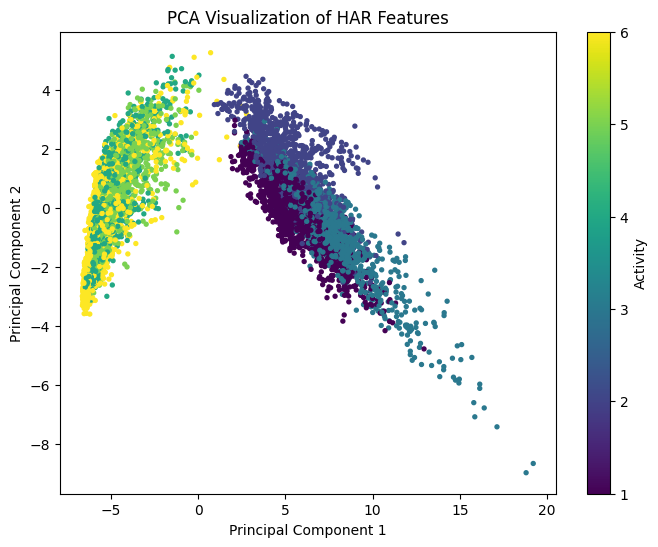

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Take first 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Make a scatter plot colored by activity
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], 
                      c=y_train["Activity"], cmap="viridis", s=8)
plt.title("PCA Visualization of HAR Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Activity")
plt.show()

### PCA shows that the activities can be meaningfully separated. Some activities form clear groups and others overlap. This shows that the motion sensor data contains meaningful patterns that a model can learn.

# Model Selection and Tuning

### I started with a decision tree as a base model. Decision trees are easy to interpret but tend to overfit with many features. After evaluating this I trained a random forest model because it usually performs better by reducing overfitting. Comparing these two models helped demonstrate the improvement gained by using an ensemble method.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.values.ravel())

# Predictions
dt_preds = dt_model.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_preds)

# Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

dt_accuracy, rf_accuracy

(0.8622327790973872, 0.9256871394638616)

### The decision tree had lower accuracy than the random forest. This was expected because a single tree usually overfits especially with a high dimensional dataset.

### The Random Forest performed much better because it averages many trees which reduces variance. This comparison showed that an ensemble method is a better fit for this problem.

<Figure size 800x600 with 0 Axes>

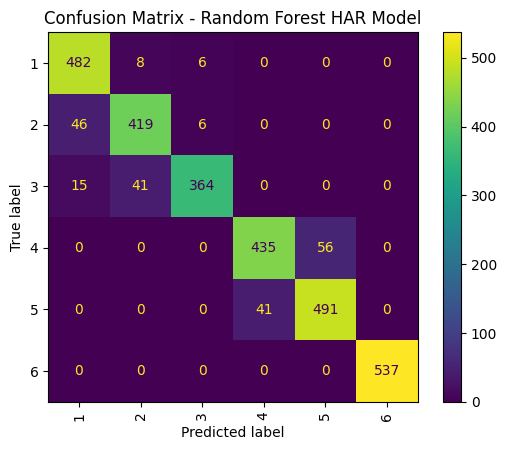

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, xticks_rotation='vertical')
plt.title("Confusion Matrix - Random Forest HAR Model")
plt.show()

# Explainability Analysis
### Work in progress.

In [20]:
!pip install shap

In [21]:
import shap

# Create SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Compute shap values on a small sample to keep it fast
sample = X_test.iloc[:100]   # YOU CAN CHANGE THE NUMBER
shap_values = explainer.shap_values(sample)

# Discussion and Conclusion
### The Random Forest model performed well on the HAR dataset. This shows that smartphone sensor features can produce effective signals for interpreting human activities. PCA showed that some activities group together and others overlap which helps explain the model’s strengths and limitations. Overall, the project confirmed that machine learning models can detect human movement accurately.

### Machine learning applied to motion data has many possible uses beyond recognizing basic activities. For example, similar models could help prosthetic limbs respond more naturally to a user’s movements, detect falls in elderly people, and provide real time feedback for athletes by analyzing running form or lifting technique. Motion-based models could also help robots learn more human like movement patterns.

### I plan to finish the SHAP interpretability section to better understand which features drive the model's decisions.